<a href="https://colab.research.google.com/github/mirozy13/Machine-learning/blob/main/Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1.**
Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [ ]:
import numpy as np
import pandas as pd
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s = s.sort_values()
print(s[s > 5][:1])

67    5.148891
dtype: float64


**Задание 2.**
Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов
фильтраций и отобразить результат:
всех, кто старше 40
всех, кто имеет доход выше среднего по датасету
всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету
создать новые столбцы:
важность клиента = доход * надежность
возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст
клиента)*Курсив*

In [ ]:
import pandas as pd
df = pd.DataFrame({
 'имя': ['Петя', 'Вася', 'Аня', 'Света'],
 'возраст': [45, 26, 41 , 21],
 'доход': [100000, 80000, 150000, 60000],
 'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
 'пол': ['муж', 'муж', 'жен', 'жен']},
 index=[0, 1, 2, 3])

middle_age=df['возраст'].mean()

df['важность клиента'] = df.apply(lambda x: x['доход'] * x['надежность клиента (0..1)'], axis=1)
df['возможная долгосрочность клиента'] = df.apply(lambda x: x['важность клиента'] * (middle_age - x['возраст']), axis=1)
df.loc[(df['возраст'] >=40)  & (df['доход'] > df.iloc[:, 2].mean())& (df['надежность клиента (0..1)'] < df.iloc[:, 3].mean())]


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


**Задание 3.**
Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?
Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [ ]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})
df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

pd.merge(df1, df2, how='inner', left_on=['fruit', 'weight'], right_on=['frukt', 'ves'])

,fruit,weight,price_x,frukt,ves,price_y
0,apple,low,93,apple,low,83
1,apple,low,13,apple,low,83
2,apple,low,21,apple,low,83


Задание 4. Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в
таблицу


In [ ]:
import random

d = [{"Name": "Виктор", "Age": 18},
 {"Name": "Мария", "Age": 21},
 {"Name": "Иван", "Age": 19},
 {"Name": "Иван", "Age": 25},
 {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)
df['Phone'] = df.apply(lambda x:'+7({}) {} {} {}'.format(np.random.randint(100,999),np.random.randint(100,999),np.random.randint(10,99),np.random.randint(10,99)),axis=1)
df

,Name,Age,Phone
0,Виктор,18,+7(194) 914 61 35
1,Мария,21,+7(498) 638 17 84
2,Иван,19,+7(333) 240 52 24
3,Иван,25,+7(584) 244 17 87
4,Алексей,20,+7(427) 545 89 89


**Задание 1**
Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA
(https://disk.yandex.ru/d/ZeDbB3rqhIr1NA) , считать через pandas. Получить список уникальных
значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам
колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете
конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение,
среднее и СКО для числа детей (household_children) в отфильтрованных данных.

 Получить список уникальных значений - стран в колонке "Country"

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/H1N1_Flu_Vaccines.csv", sep=',')
country=df['hhs_geo_region'].unique()
country

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca', nan],
      dtype=object)

Отфильтровать и получить данные только по выпускникам колледжа + убрать строки с пропусками в данных (NaN).

In [ ]:
null= df.dropna(axis=0, how='any')
graduates=null[(df == 'College Graduate').any(axis=1)]
graduates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1.0,1.0
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0.0,0.0
22,22,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",2.0,1.0,wxleyezf,emcorrxb,0.0,0.0
34,34,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,2.0,wxleyezf,bxpfxfdn,1.0,1.0
47,47,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,vjjrobsf,xtkaffoo,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14220,14220,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0.0,0.0
14222,14222,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,dqpwygqj,"MSA, Principle City",1.0,0.0,wlfvacwt,xgwztkwe,0.0,1.0
14223,14223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,fpwskwrf,"MSA, Not Principle City",0.0,0.0,saaquncn,xtkaffoo,0.0,0.0
14225,14225,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,3.0,wxleyezf,xtkaffoo,1.0,0.0


Подсчитать макс значение

In [ ]:
maxValues = graduates['household_children'].max()
maxValues

3.0

Подсчитать среднее значение

In [ ]:
meanValue = graduates['household_children'].mean()
meanValue

0.6375442739079102

СКО для числа детей (household_children) в отфильтрованных данных.

In [ ]:
CKO = graduates['household_children'].std()
CKO

0.9591331068750336

Отфильтровать данные по России и золотым медалистам, построить график разброса возраст вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna().
Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать
колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения,
датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).


Отфильтровать данные по России и золотым медалистам

In [ ]:
import pandas as pd
import numpy as np
df1 = pd.read_excel("/content/Olympics 2018 .xlsx",sheet_name="Olympics")
medal=df1[(df1 == 'GOLD').any(axis=1)]
russians=medal[(medal['Country']== 'Soviet Union')]
russians

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,City,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
17812,17812,1980,Archery,M,Individual,Tomi Poikolainen,18.0,2455,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17815,17815,1980,Archery,F,Individual,Keto Losaberidze,30.0,2491,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17818,17818,1980,Athletics,M,100m,Allan Wells,28.0,10.25,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17821,17821,1980,Athletics,F,100m,Lyudmila Kondratyeva,22.0,11.06,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17824,17824,1980,Athletics,M,200m,Pietro Mennea,28.0,20.19,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19177,19177,1980,Wrestling,M,Greco-Roman Welterweight 74Kg,Ferenc Kocsis,27.0,NaN,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19180,19180,1980,Wrestling,M,Greco-Roman Middleweight 82Kg,Gennady Korban,31.0,NaN,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19183,19183,1980,Wrestling,M,Greco-Roman Light Heavyweight 90Kg,Norbert Növényi,23.0,NaN,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19186,19186,1980,Wrestling,M,Greco-Roman Heavyweight 100Kg,Georgi Raikov,26.0,NaN,GOLD,Moscow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построить график разброса возраст вид_спорта

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

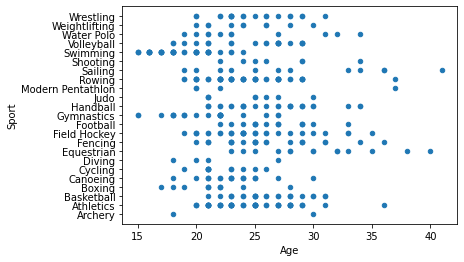

In [ ]:
from google.colab import files
russians.plot.scatter(x = 'Age', y = 'Sport', s = 20)
plt.savefig('Scatter plot.pdf')
files.download('Scatter plot.pdf')

Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna().

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

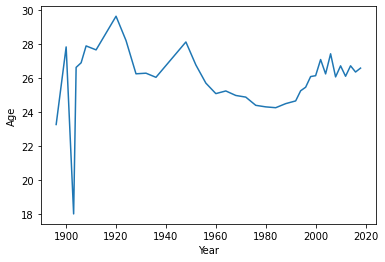

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1.groupby('Year').Age.mean().dropna())
plt.xlabel("Year")
plt.ylabel("Age")
plt.savefig('Line graph.pdf')
files.download('Line graph.pdf')
plt.show()

Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения

In [ ]:
df2 = pd.read_excel("/content/Olympics 2018 .xlsx",sheet_name="Olympics")
df2.insert(2,'Birth', df2.apply(lambda x: x['Year'] - x['Age'], axis=1))
df2['Birth'] = df2['Birth'].fillna(0).astype(np.int64)
summer=df2[(df2['Season']== 'Summer')]
drop= summer.drop(['City'], axis=1)
drop


,Sort,Year,Birth,Sport,Gender,Event,Athlete,Age,Result,Medal,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,1,1896,1875,Athletics,M,100m,Tom Burke,21.0,12,GOLD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1896,1872,Athletics,M,100m,Fritz Hofmann,24.0,12.2,SILVER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1896,1875,Athletics,M,100m,Francis Lane,21.0,12.6,BRONZE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1896,1872,Athletics,M,100m,Alajos Szokolyi,24.0,12.6,BRONZE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1896,1875,Athletics,M,400m,Tom Burke,21.0,54.2,GOLD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,39936,2016,1986,Wrestling,M,98,Ghasem Rezaei,30.0,NaN,BRONZE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39937,39937,2016,1983,Wrestling,M,130,Mijain Lopez,33.0,NaN,GOLD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39938,39938,2016,1990,Wrestling,M,130,Riza Kayaalp,26.0,NaN,SILVER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39939,39939,2016,1989,Wrestling,M,130,Sabah Shariati,27.0,NaN,BRONZE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
